# Modules

In [92]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Shears

In [93]:
shears = []

for i in range(1, 4):

    shear2 = sa.find_shear("data/v{}_nsp_not_sheared.csv".format(i), "data/v{}_nsp_sheared.csv".format(i), plot = False, smoothing_period = 1/80, how = "slope")
    shear = sa.find_shear("data/v{}_sp_not_sheared.csv".format(i), "data/v{}_sp_sheared.csv".format(i), plot = False, smoothing_period = 1/80, how = "slope")
    print("v{} - sp".format(i))
    print(shear)
    print("v{} - nsp".format(i))
    print(shear2)
    print("\n")
    shears.append(np.abs(shear)-np.abs(0))
print(shears)

v1 - sp
0.04611389747608144
v1 - nsp
0.020124700908938226


v2 - sp
0.07937820892480713
v2 - nsp
0.01100743033117476


v3 - sp
0.08976658693462616
v3 - nsp
0.007123602075951794


[0.04611389747608144, 0.07937820892480713, 0.08976658693462616]


Starting SPIDER calculations.

1/3
2/3
3/3

Yaaay! Everything seems fine!



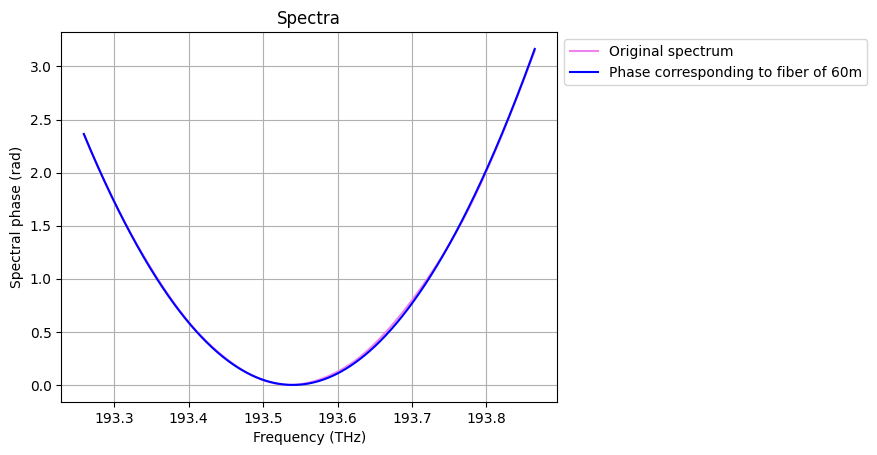

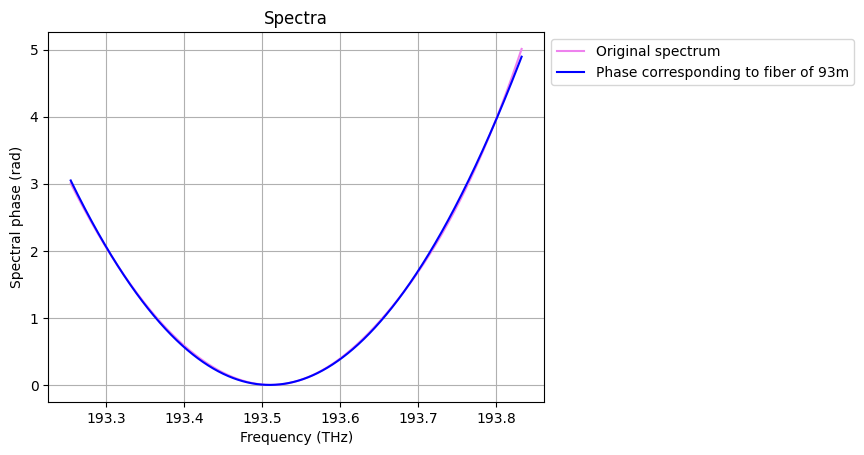

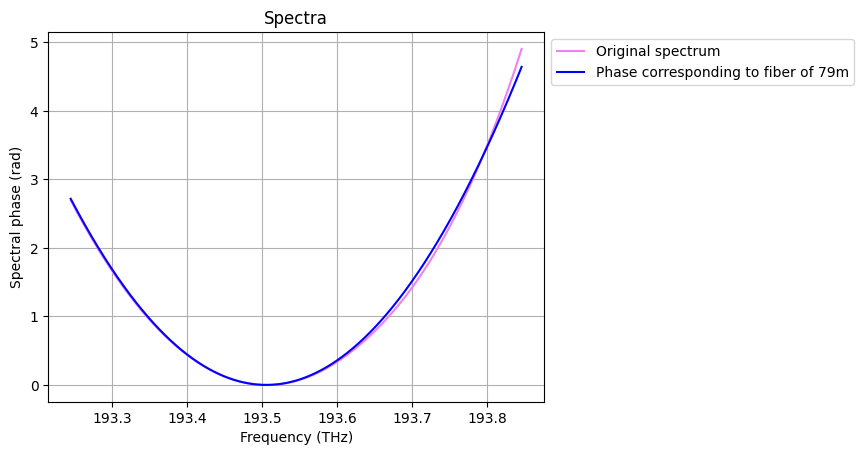

In [94]:
phases = []

print("Starting SPIDER calculations.\n")

for i in range(3):
    phase = sa.spider(phase_spectrum = "data/v{}_p_spectrum.csv".format(i+1),
                      temporal_spectrum = "data/v{}_t_spectrum.csv".format(i+1),
                      shear = shears[i],
                      smoothing_period = 0.065,
                      plot_phase = False,
                      plot_steps = False,
                      what_to_return = "phase"
                      )[1]
    if np.mean(phase.Y) < 0 : phase.Y *= -1
    phases.append(phase)
    print("{}/{}".format(i+1, 3))

print("\nYaaay! Everything seems fine!\n")


for i in range(3):
    fiber = sa.fit_fiber_length(phases[i], plot = True)

# Simulation

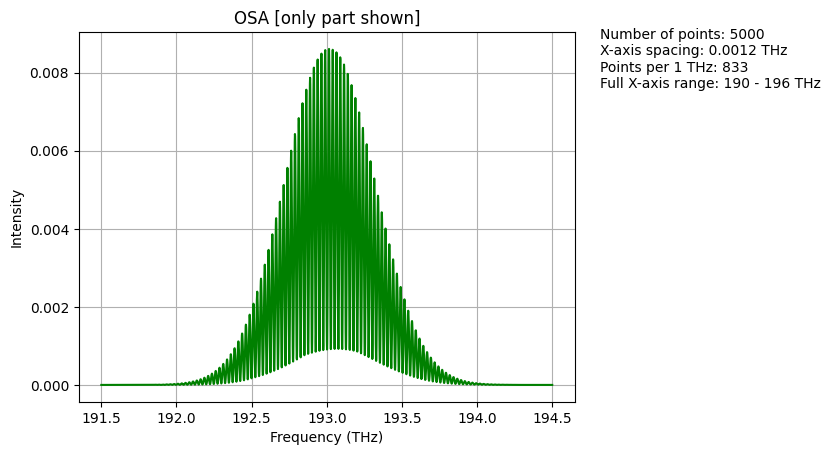

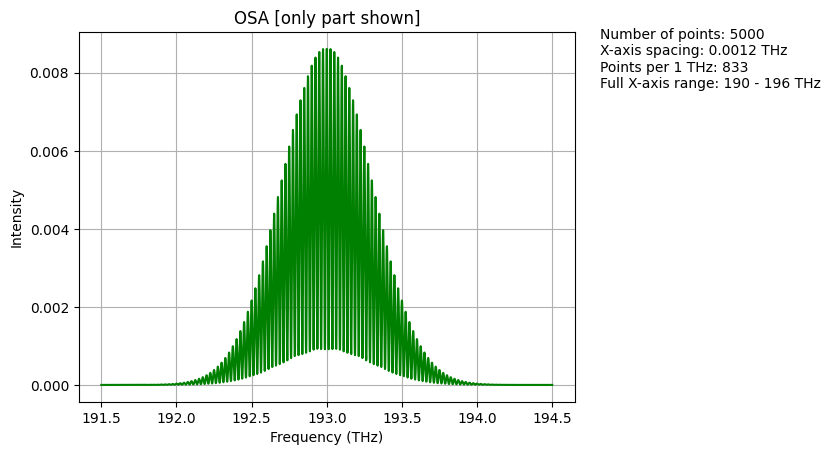

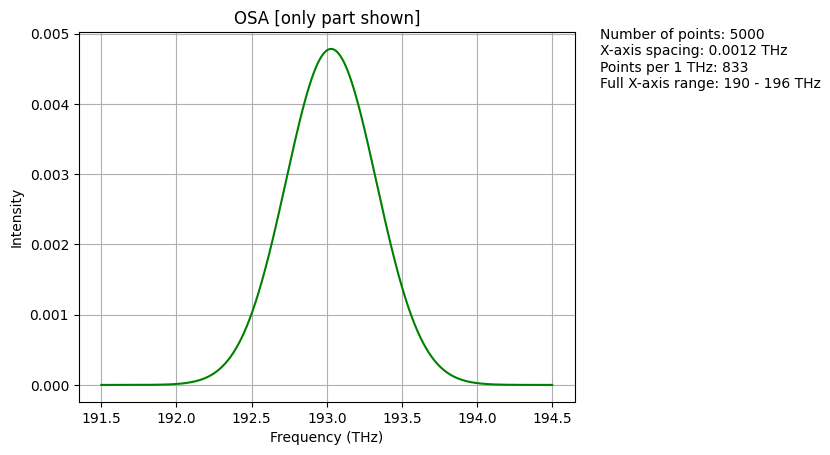

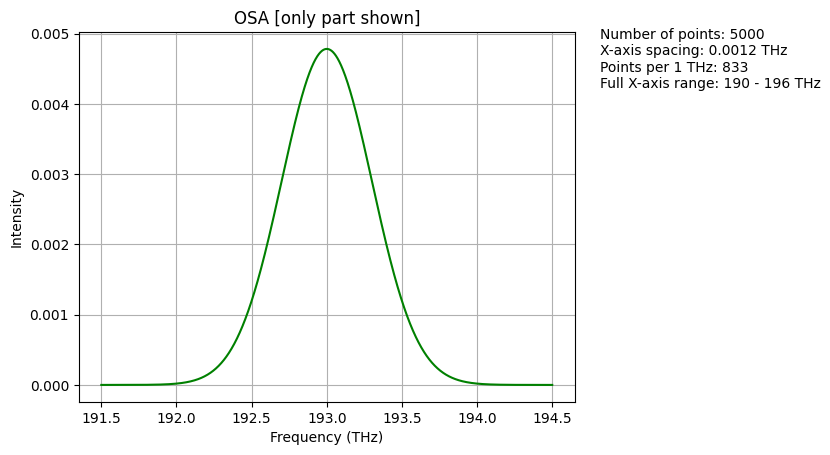

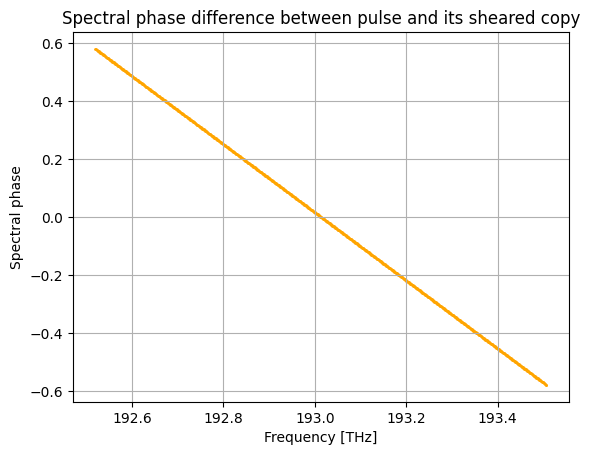

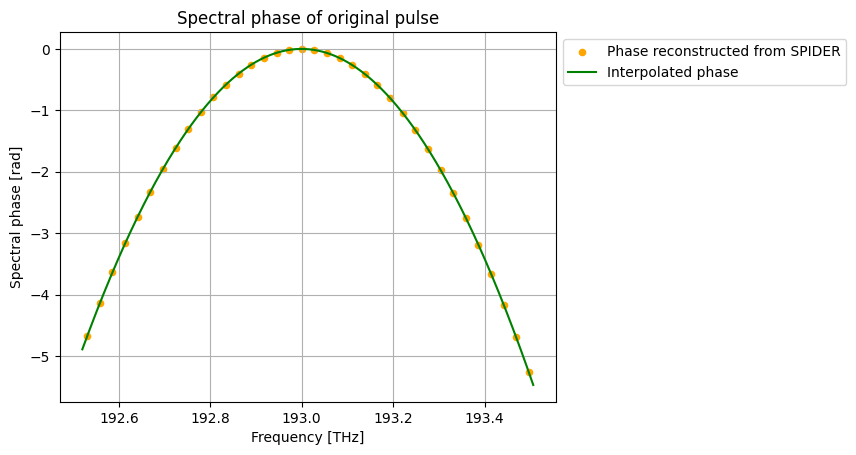

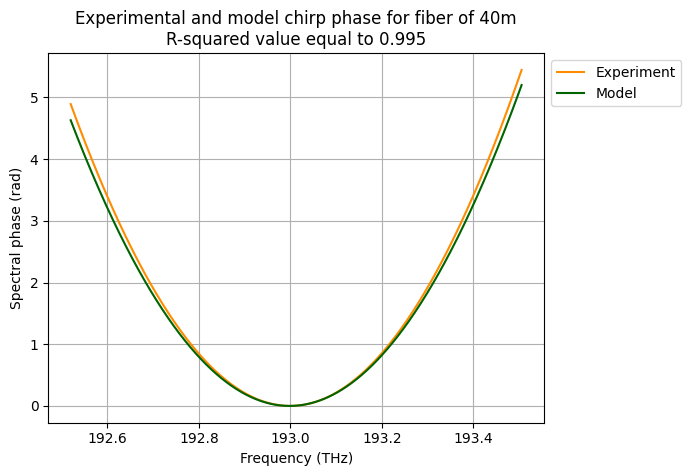

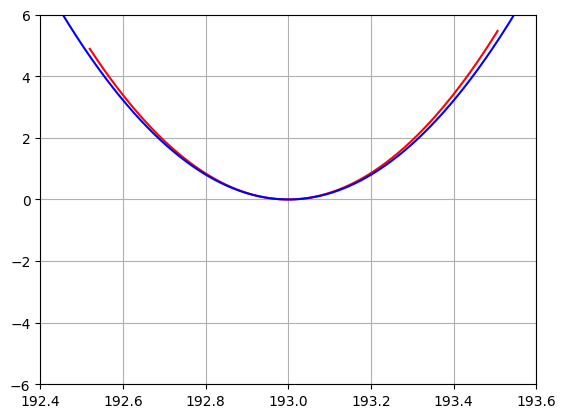

In [95]:
pulse = sa.hermitian_pulse(0, [190, 196], 193, 1, 5000)
zero_pulse = pulse.copy()
zero_pulse.Y *= 0
spectra = []
for i in range(4):
    my_beam = sa.beam(pulse.copy(), zero_pulse.copy())
    my_beam.chirp("ver", 40)
    if i < 2: 
        my_beam.rotate(np.pi/4*0.6)
    my_beam.delay("ver", 40)
    if i % 2 == 0: 
        my_beam.shear(0.03, "ver")
    my_beam.rotate(np.pi/4)
    my_beam.polarizer("ver")
    spectra.append(my_beam.OSA(191.5, 194.5))

shear = sa.find_slope_shift(spectra[2], spectra[3])

phase = sa.spider(phase_spectrum = spectra[0],
          temporal_spectrum = spectra[1], 
          shear = shear,
          plot_phase = True,
          what_to_return = "phase")[1]

if np.mean(phase.Y) < 0: phase.Y *= -1

sa.chirp_r2(phase, 40, True)

l_0 = 1550
c = 3*1e8
D_l = 20
fiber_length = 40
omega = pulse.X
omega_mean = pulse.quantile(1/2)
phase2 = l_0**2*fiber_length*D_l/(c)*(omega-omega_mean)**2*np.pi

plt.plot(phase.X, phase.Y, color = "red")
plt.plot(omega, phase2, color = "blue")
plt.xlim([192.4,193.6])
plt.ylim([-6, 6])
plt.grid()
plt.show()